In [1]:
# 1-1. 데이터 가져오기 

import pandas as pd 
import matplotlib.pyplot as plt 


socar = pd.read_csv('../../0. raw_data/insurance_fraud_detect_data.csv')
socar 

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,...,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,...,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,...,1209410,1,0,0,2,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,100,2,0,...,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,...,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,...,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,...,0,4,1,0,1,0,0,0,-1,0


In [2]:
# train-test 분리

df = socar[socar['test_set']==0]
df_test = socar[socar['test_set']==1]


In [3]:
# test_set 분리 
X_test = df_test.drop('fraud_YN', axis = 1)
y_test = df_test['fraud_YN']

<Figure size 432x288 with 0 Axes>

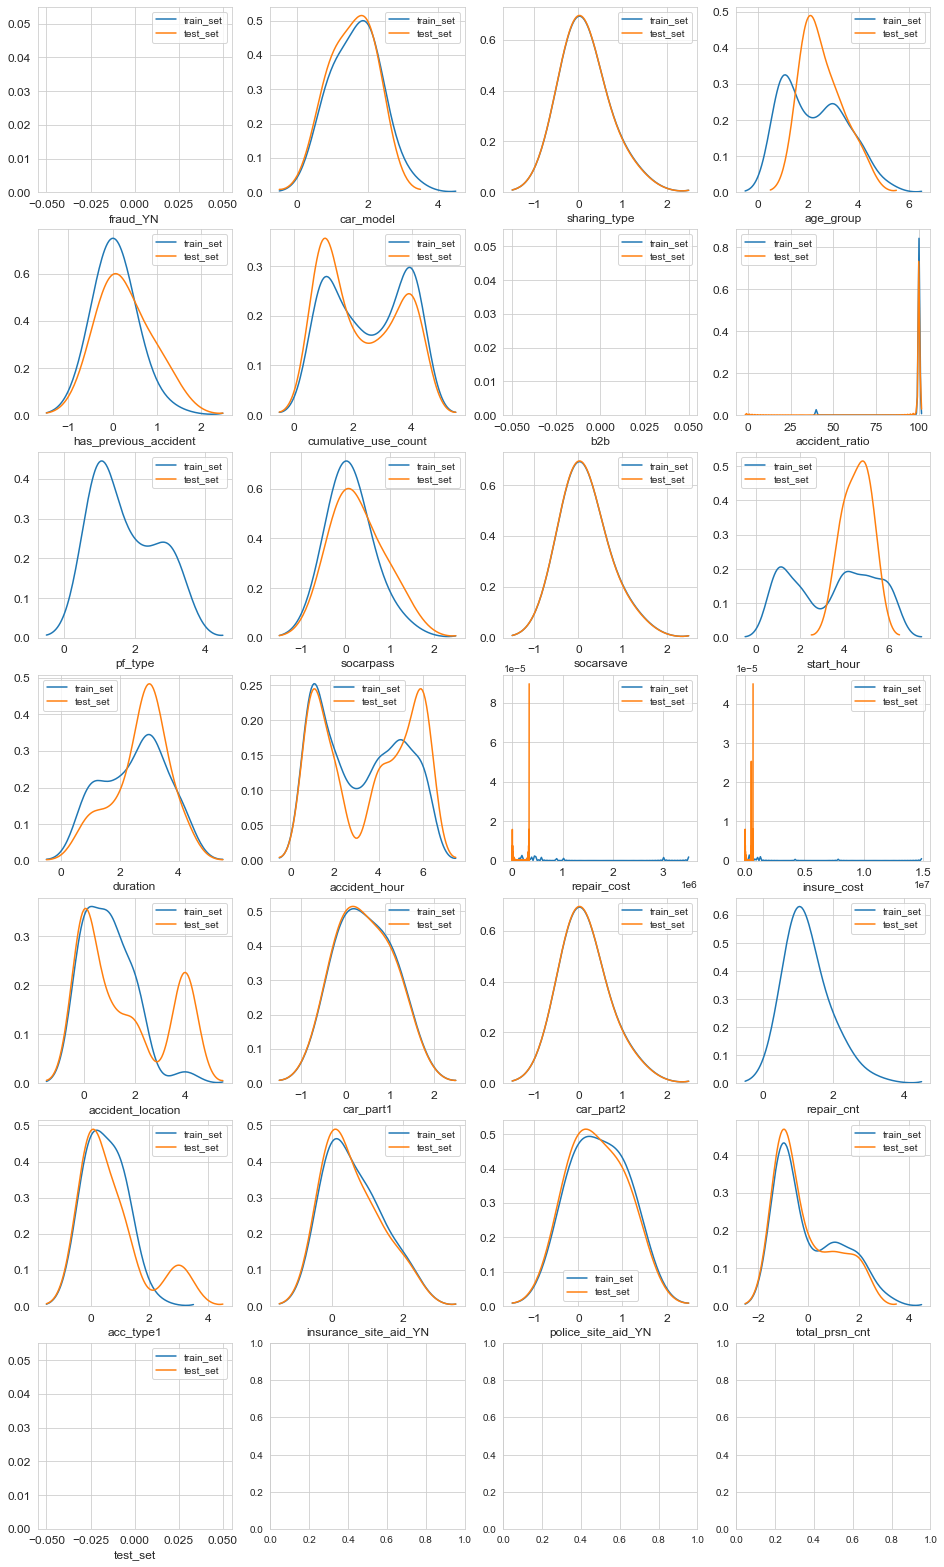

In [7]:
# fraud 데이터 train / test 분포 확인 

import seaborn as sns 

var = socar.columns.values 
i=0 

t0 = df.loc[df['fraud_YN']==1]
t1 = df_test.loc[df_test['fraud_YN']==1]

sns.set_style('whitegrid')
plt.figure()
fig,ax = plt.subplots(7,4,figsize=(16,28))

for feature in var:
    i += 1 
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw = 0.5, label='train_set')
    sns.kdeplot(t1[feature], bw = 0.5, label = 'test_set')
    plt.xlabel(feature, fontsize=12)
    locs, labels =plt.xticks()

    plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

# fraud 데이터의 분석 
- train / test 의 fraud 데이터 분포가 다름 
- train : 20세의 차대차 도로 오후 
- test : 23세의 차량단독 쏘카존 오전 

## train / test set 에 대한 성능 차이 불가피함 
- test 재 추출하여 최종 성능 평가 시 활용함 

In [35]:
from sklearn.model_selection import train_test_split

# test set 삭제 
socar.tail()
socar_re = socar.drop(columns='test_set', axis=1)

# train / test 분리 
y = socar_re['fraud_YN']
X = socar_re.drop('fraud_YN', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13, stratify = y)

# 비율 확인 
print(y_train.value_counts()/y_train.shape[0]*100) 
print(y_test.value_counts()/y_test.shape[0]*100)

# train-valid 분리 

# trainset X,y 합치기 
train_set = pd.DataFrame(y_train).join(X_train)
train_set

# train set -  train-valid 분리 

y_target = train_set['fraud_YN']
X_features = train_set.drop('fraud_YN', axis = 1)

X_train_val, X_valid, y_train_val, y_valid = train_test_split(X_features, y_target, test_size = 0.2, random_state = 13, stratify = y_target)

# 비율 확인 
print(y_train_val.value_counts()/y_train_val.shape[0]*100) 
print(y_valid.value_counts()/y_valid.shape[0]*100)


0    99.742188
1     0.257812
Name: fraud_YN, dtype: float64
0    99.75
1     0.25
Name: fraud_YN, dtype: float64
0    99.746094
1     0.253906
Name: fraud_YN, dtype: float64
0    99.726562
1     0.273438
Name: fraud_YN, dtype: float64


<Figure size 432x288 with 0 Axes>

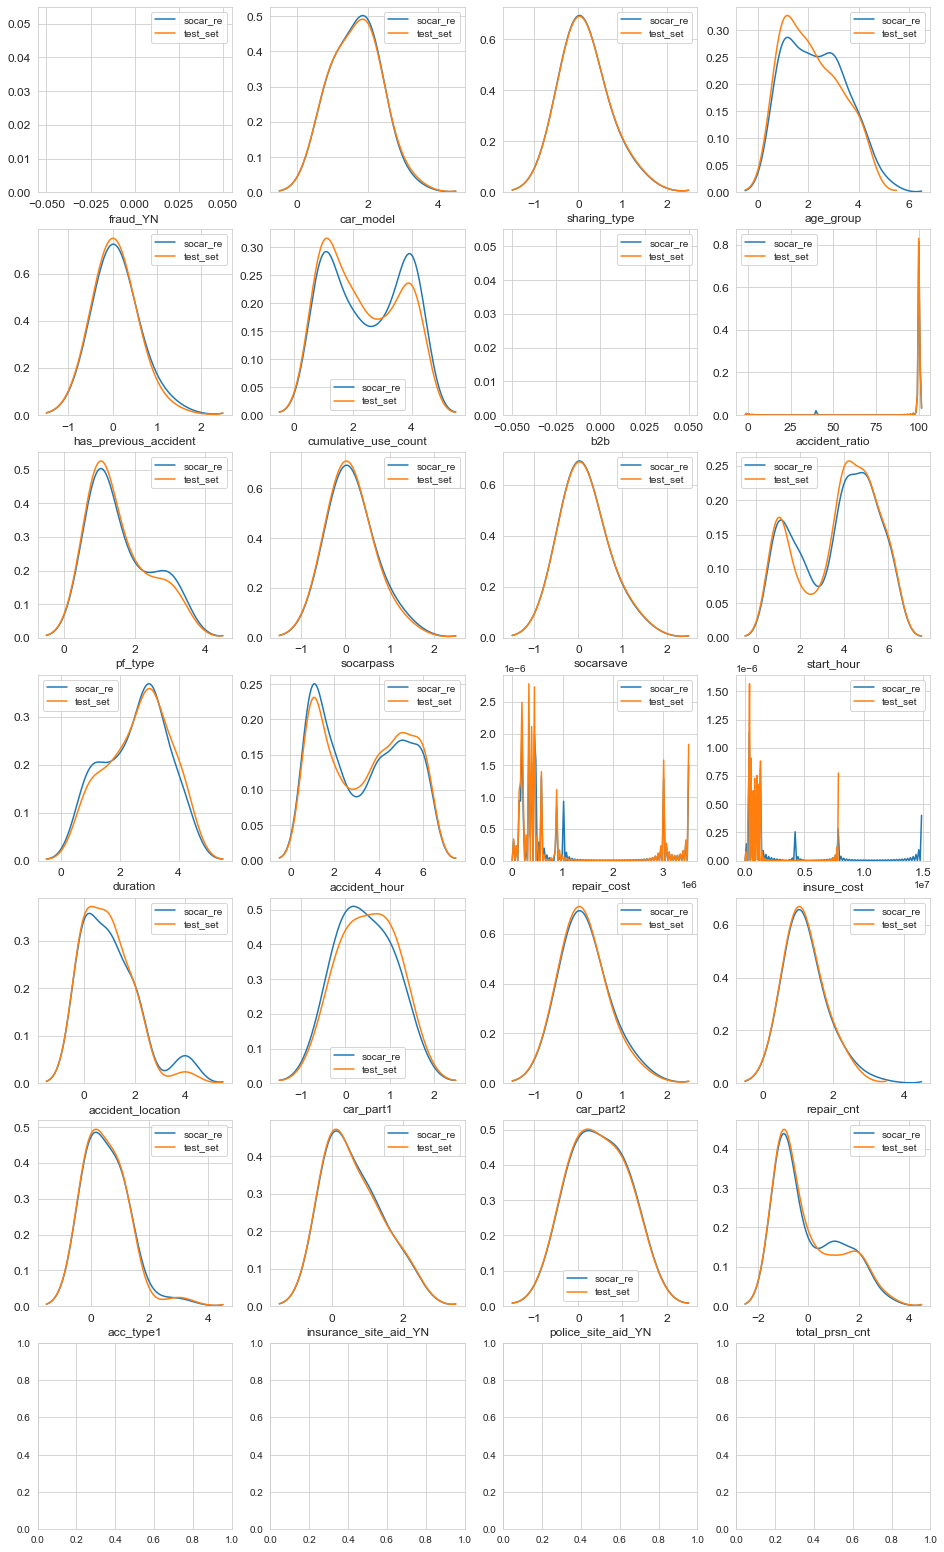

In [45]:
# fraud 데이터 train / test 분포 확인 

import seaborn as sns 

var = socar_re.columns.values
i=0 

t0 = socar_re.loc[socar_re['fraud_YN']==1]
t1 = train_set.loc[train_set['fraud_YN']==1]

sns.set_style('whitegrid')
plt.figure()
fig,ax = plt.subplots(7,4,figsize=(16,28))

for feature in var:
    i += 1 
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw = 0.5, label='socar_re')
    sns.kdeplot(t1[feature], bw = 0.5, label = 'test_set')
    plt.xlabel(feature, fontsize=12)
    locs, labels =plt.xticks()

    plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

# trial#1 

In [47]:
X_valid

,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,...,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt
9999,1,0,4,0,1,0,100,2,0,0,...,274900.86960,1203920,0,0,1,2,0,0,0,-1
9316,1,0,2,0,1,0,100,1,0,0,...,208593.09760,980790,0,1,0,1,0,0,0,-1
12952,5,0,4,0,1,0,100,2,0,0,...,238321.74870,500000,1,1,0,1,0,0,0,-1
3896,2,0,3,0,2,0,100,3,1,0,...,374212.73470,0,2,0,0,1,0,0,0,-1
5889,2,0,3,0,1,2,100,2,0,0,...,89346.56816,0,4,0,0,1,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,2,0,1,0,1,0,100,3,0,0,...,428399.41910,918000,1,0,1,3,0,0,0,-1
5126,2,0,3,0,4,0,100,2,0,0,...,0.00000,0,0,0,0,1,0,0,0,-1
12015,2,0,3,0,4,0,100,3,0,0,...,503077.41710,0,0,0,0,1,0,0,0,-1
12665,1,0,3,0,1,0,100,1,0,0,...,0.00000,0,0,0,1,1,0,0,0,-1


In [74]:
# 파이프라인 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

# 파이프라인 생성 
lr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(random_state=13)),
    ])
df_pipe =  Pipeline([
    ("scaler", StandardScaler()),
    ("clf", DecisionTreeClassifier(random_state=13))])
rf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(random_state=13))])
lgbm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LGBMClassifier(random_state=13))])
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LinearSVC(random_state=13))])


# 각 모델 파라미터 정해주기 
# lr_param_grid = [{'clf__penalty': ['l1', 'l2', 'elasticnet', 'none']}]
lr_param_grid = [{'clf__penalty': ['none']}]
# dt_param_grid = [{'clf__criterion':['gini', 'entropy'], 'clf__max_depth':[None,2,3,6]}]
dt_param_grid = [{'clf__max_depth':[3,6]}]
# rf_param_grid = [{'clf__n_estimators': [1, 5, 10, 20],
#                   'clf__max_depth' : [2, 3, 4, 5, 10, 50, 100]}]
rf_param_grid = [{'clf__n_estimators': [1, 5, 10],
                  'clf__max_depth' : [3, 5, 10, 50]}]
# lgbm_param_grid = [{'clf__n_estimators': [200,500,800], 'clf__num_leaves': [32, 64],\
#                    'clf__max_depth': [80,128], 'clf__min_child_samples': [60, 100]}]
lgbm_param_grid = [{'clf__n_estimators': [200,500], 'clf__num_leaves': [32, 64],\
                   'clf__max_depth': [80,128], 'clf__min_child_samples': [60, 100]}]

svm_param_grid = [{"clf__loss": ["hinge"]}]

# grid search 
lr_clf = GridSearchCV(lr_pipe, lr_param_grid, cv=5, refit=True, scoring='recall')
dt_clf = GridSearchCV(df_pipe, dt_param_grid, cv=5, refit=True, scoring='recall')
rf_clf = GridSearchCV(rf_pipe, rf_param_grid, cv=5, refit=True, scoring='recall')
lgbm_clf = GridSearchCV(lgbm_pipe, lgbm_param_grid, cv=5, refit=True, scoring='recall')
svm_clf = GridSearchCV(svm_pipe, svm_param_grid, cv=5, refit=True,scoring='recall')


In [54]:
# 학습 / 예측 / 평가 함수 

# 평가 함수 

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    # confusion = confusion_matrix(y_test, pred) #오차행렬
    accuracy = accuracy_score(y_test,pred) # 정확도 
    precision = precision_score(y_test,pred) # 정밀도
    recall = recall_score(y_test,pred) # 재현율 
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred)
    return accuracy, precision, recall, f1, roc_auc

# 성능 DF 반환 

def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

# 다수의 모델 성능 비교 

def get_result_df(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['Accuracy', 'precision', 'recall', 'f1', 'roc']
    tmp = []
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)


# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train_val, y_train_val, X_valid, y_valid)
results 


,Accuracy,precision,recall,f1,roc
LogiReg,0.997266,0.0,0.0,0.0,0.500000
DecisionTree,0.989844,0.0,0.0,0.0,0.496279
RandomFore,0.997266,0.0,0.0,0.0,0.500000
LGBM,0.997266,0.0,0.0,0.0,0.500000
SVC,0.997266,0.0,0.0,0.0,0.500000


In [55]:
# 함수 - 테스트 예측값 
def get_result_test(model, X_test, y_test):
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

# 함수 - 테스트 예측값 DF 
def get_result_df_test(models, model_names, X_test, y_test):
    col_names = ['Accuracy_test', 'precision_test', 'recall_test', 'f1_Test', 'roc_test']
    tmp = []
    for model in models:
        tmp.append(get_result_test(model, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results_test = get_result_df_test(models, model_names, X_test, y_test)
results_test

,Accuracy_test,precision_test,recall_test,f1_Test,roc_test
LogiReg,0.997500,0.0,0.0,0.0,0.500000
DecisionTree,0.993125,0.0,0.0,0.0,0.497807
RandomFore,0.997500,0.0,0.0,0.0,0.500000
LGBM,0.997500,0.0,0.0,0.0,0.500000
SVC,0.997500,0.0,0.0,0.0,0.500000


In [56]:
total_results = results.join(results_test)
total_results

,Accuracy,precision,recall,f1,roc,Accuracy_test,precision_test,recall_test,f1_Test,roc_test
LogiReg,0.997266,0.0,0.0,0.0,0.500000,0.997500,0.0,0.0,0.0,0.500000
DecisionTree,0.989844,0.0,0.0,0.0,0.496279,0.993125,0.0,0.0,0.0,0.497807
RandomFore,0.997266,0.0,0.0,0.0,0.500000,0.997500,0.0,0.0,0.0,0.500000
LGBM,0.997266,0.0,0.0,0.0,0.500000,0.997500,0.0,0.0,0.0,0.500000
SVC,0.997266,0.0,0.0,0.0,0.500000,0.997500,0.0,0.0,0.0,0.500000


In [59]:
# resampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler 
from imblearn.combine import SMOTEENN


In [60]:
# trial 2 

# train 데이터 샘플링 - 오버샘플링 
ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train_val, y_train_val)

In [68]:

# 학습-평가 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_test = get_result_df_test(models, model_names, X_test, y_test)
total_results = results.join(results_test)
total_results


,Accuracy,precision,recall,f1,roc,Accuracy_test,precision_test,recall_test,f1_Test,roc_test
LogiReg,0.823828,0.002242,0.142857,0.004415,0.484276,0.824063,0.000000,0.000,0.000000,0.413064
DecisionTree,0.775000,0.000000,0.000000,0.000000,0.388562,0.766563,0.001350,0.125,0.002670,0.446585
RandomFore,0.860547,0.000000,0.000000,0.000000,0.431453,0.877500,0.002591,0.125,0.005076,0.502193
LGBM,0.992578,0.000000,0.000000,0.000000,0.497650,0.994062,0.000000,0.000,0.000000,0.498277
SVC,0.825391,0.002262,0.142857,0.004454,0.485060,0.821562,0.001770,0.125,0.003490,0.474154


# trial 3

In [78]:
# train 데이터 샘플링 - 오버샘플링 
rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train_val, y_train_val)

In [79]:

# 학습-평가 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_test = get_result_df_test(models, model_names, X_test, y_test)
total_results = results.join(results_test)
total_results


,Accuracy,precision,recall,f1,roc,Accuracy_test,precision_test,recall_test,f1_Test,roc_test
LogiReg,0.836719,0.004819,0.285714,0.009479,0.561972,0.835938,0.0,0.0,0.0,0.419016
DecisionTree,0.876563,0.003215,0.142857,0.006289,0.510716,0.866563,0.0,0.0,0.0,0.434367
RandomFore,0.996484,0.000000,0.000000,0.000000,0.499608,0.995000,0.0,0.0,0.0,0.498747
LGBM,0.989062,0.000000,0.000000,0.000000,0.495887,0.990938,0.0,0.0,0.0,0.496711
SVC,0.826953,0.004545,0.285714,0.008949,0.557076,0.831250,0.0,0.0,0.0,0.416667


In [80]:
# for 문 활용 

In [81]:
socar_df = pd.read_csv('../../0. raw_data/insurance_fraud_detect_data.csv')

socar = socar_df.copy()
socar.tail()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
15995,0,2,0,2,0,2,0,100,2,0,...,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,...,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,...,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,...,0,4,1,0,1,0,0,0,-1,0
15999,0,2,0,2,0,1,0,100,1,0,...,1188750,2,0,0,1,0,0,0,-1,0


In [82]:
socar_tr = socar[socar.test_set == 0].drop(['test_set'], axis=1)
socar_test = socar[socar.test_set == 1].drop(['test_set'], axis=1)

In [83]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc


In [84]:
from sklearn.decomposition import PCA


def get_pca_data(data, random_state, n_components=2):
    pca = PCA(n_components=n_components, random_state=random_state)
    pca.fit(data)
    
    return pca.transform(data), pca

In [85]:
tmp = []

def get_result_pd(models, model_names, X_train, y_train, X_test, y_test, test_data_X, test_data_y):
    col_names = ['accuracy','precision','recall','f1','roc_auc']
    
    
    for model in models:
        # Modeling
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        tmp.append(get_clf_eval(y_test, pred))
        # predict test dataset
        pred_test = model.predict(test_data_X)
        tmp.append(get_clf_eval(test_data_y, pred_test))


def color(val):
    color = 'orange' if val > 0.6 else 'black'
    return 'color: %s' % color

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler)
from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC


def model_scores(train_data, test_data, scaler, drop_cols=[], sampling=SMOTE, random_state=13, n_components=2):
    
    # drop columns
    if drop_cols:
        try:
            train_data = train_data.drop(drop_cols, axis=1) 
            test_data = test_data.drop(drop_cols, axis=1)
        except:
            None
        
    # split dataset        
    X = train_data.drop('fraud_YN', axis=1)
    y = train_data.fraud_YN
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
    
    X_eval = test_data.drop('fraud_YN', axis=1)
    y_eval = test_data.fraud_YN    
    
    # scaling
    num_attribs = ['accident_ratio', 'repair_cost', 'insure_cost']
    
    if drop_cols:
        num_attribs = [attrib for attrib in num_attribs if attrib not in drop_cols]
    
    scaler_obj = scaler()
    scaler_obj.fit(X_train[num_attribs])

    X_train[num_attribs] = scaler_obj.transform(X_train[num_attribs])
    X_test[num_attribs] = scaler_obj.transform(X_test[num_attribs])
    X_eval[num_attribs] = scaler_obj.transform(X_eval[num_attribs])
    
    # sampling
    spl = sampling(random_state=random_state)
    X_train, y_train = spl.fit_sample(X_train, y_train)    
    
    # PCA
    if n_components:
        X_train, pca1 = get_pca_data(X_train, n_components=n_components, random_state=random_state)
        X_test, pca1 = get_pca_data(X_test, n_components=n_components, random_state=random_state)
        X_eval, pca1 = get_pca_data(X_eval, n_components=n_components, random_state=random_state)
    
    # classifier
    lg_clf = LogisticRegression(random_state=random_state)
    dt_clf = DecisionTreeClassifier(random_state=random_state, max_depth=2)
    rf_clf = RandomForestClassifier(random_state=random_state, n_jobs=-1, n_estimators=100)
    lgbm_clf = LGBMClassifier(random_state=random_state, n_estimators=200, num_leaves=16, n_jobs=-1, boost_from_average=False)
    svm_clf = LinearSVC(random_state=random_state)
    
    models = [lg_clf, dt_clf, rf_clf, lgbm_clf, svm_clf]
    model_names = ['LogisticRegression','LogisticRegression(test)','DecisionTree','DecisionTree(test)',
                   'RandomForest','RandomForest(test)','LightGBM','LightGBM(test)', 'SupportVectorMachine', 'SupportVectorMachine(test)']
    
    start_time = time.time()
    results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test, X_eval, y_eval)
    
    return results

In [89]:
n_components = [2,3,4,5]
samplers=[SMOTE, ADASYN, RandomUnderSampler, SMOTEENN, RandomOverSampler]
drop_cols=[[], ['sharing_type', 'has_previous_accident', 'socarpass', 'car_part2'], ['insurance_site_aid_YN', 'police_site_aid_YN']]

In [90]:
for n_component in n_components:
    for sampler in samplers:
        for column in drop_cols:
            model_scores(socar_tr, socar_test, MinMaxScaler, n_components=n_component, sampling=sampler, drop_cols=column)

In [91]:
df = pd.DataFrame(tmp, columns=['accuracy','precision','recall','f1','roc_auc'])

In [92]:
df

,accuracy,precision,recall,f1,roc_auc
0,0.502717,0.004666,0.857143,0.009281,0.679447
1,0.519385,0.003327,0.714286,0.006623,0.616616
2,0.895186,0.003774,0.142857,0.007353,0.520047
3,0.918936,0.000000,0.000000,0.000000,0.460501
4,0.989130,0.043478,0.142857,0.066667,0.567147
...,...,...,...,...,...
745,0.997757,0.000000,0.000000,0.000000,0.500000
746,0.996894,0.000000,0.000000,0.000000,0.499805
747,0.997757,0.000000,0.000000,0.000000,0.500000
748,0.508540,0.003940,0.714286,0.007837,0.611133


In [93]:
# train score
df.loc[[n * 2 for n in range(300)]].to_excel('1.xlsx')

In [94]:
# test score
df.loc[[n * 2 + 1 for n in range(300)]].to_excel('2.xlsx')

In [95]:
for n_component in n_components:
    for sampler in samplers:
        for column in drop_cols:
            model_scores(socar_tr, socar_test, StandardScaler, n_components=n_component, sampling=sampler, drop_cols=column)

In [96]:
df = pd.DataFrame(tmp, columns=['accuracy','precision','recall','f1','roc_auc'])

In [98]:
# train score
df.loc[[n * 2 for n in range(300)]].to_excel('3.xlsx')

In [99]:
# test score
df.loc[[n * 2 + 1 for n in range(300)]].to_excel('4.xlsx')

In [100]:
for n_component in n_components:
    for sampler in samplers:
        for column in drop_cols:
            model_scores(socar_tr, socar_test, RobustScaler, n_components=n_component, sampling=sampler, drop_cols=column)

In [101]:
df = pd.DataFrame(tmp, columns=['accuracy','precision','recall','f1','roc_auc'])

In [102]:
# train score
df.loc[[n * 2 for n in range(300)]].to_excel('3.xlsx')

# 다시 

In [103]:
socar = pd.read_csv('../../0. raw_data/insurance_fraud_detect_data.csv')
socar.tail()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
15995,0,2,0,2,0,2,0,100,2,0,...,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,...,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,...,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,...,0,4,1,0,1,0,0,0,-1,0
15999,0,2,0,2,0,1,0,100,1,0,...,1188750,2,0,0,1,0,0,0,-1,0


In [110]:
# 전처리 진행 
# 1. 불필요 피쳐 삭제 (sharing_type has_previous_accident socarpass car_part2)

socar_1 = socar.copy()
socar_1 = socar_1.drop(columns=['sharing_type','has_previous_accident','socarpass', 'car_part2'],axis=1)

# 2. 범주형 컬럼 묶어주기 
## start_hour 123->1 / 456->2
socar_1['start_hour'].replace(2,1,inplace = True)
socar_1['start_hour'].replace(3,1,inplace = True)
socar_1['start_hour'].replace(4,2,inplace = True)
socar_1['start_hour'].replace(5,2,inplace = True)
socar_1['start_hour'].replace(6,2,inplace = True)

## age_group 1,2 -> 1 / 3,4 -> 2 / 5 ->3 
socar_1['age_group'].replace(2,1,inplace = True)
socar_1['age_group'].replace(3,2,inplace = True)
socar_1['age_group'].replace(4,2,inplace = True)
socar_1['age_group'].replace(5,3,inplace = True)

## accident_location 0,4 -> 0 , 1,2,3 ->1 5 ->2
socar_1['accident_location'].replace(4,0,inplace = True)
socar_1['accident_location'].replace(2,1,inplace = True)
socar_1['accident_location'].replace(3,1,inplace = True)
socar_1['accident_location'].replace(5,2,inplace = True)

# 3. cost -> knn 처리 repair_cost insure_cost
from sklearn.impute import KNNImputer
col = socar_1.columns
socar_1['repair_cost'].replace(0, np.nan, inplace=True)
socar_1['insure_cost'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=2)

socar_1_filled = pd.DataFrame(imputer.fit_transform(socar_1))
socar_1_filled

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,2.0,2.0,2.0,0.0,100.0,2.0,0.0,2.0,2.0,...,1.302547e+05,1478455.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
1,0.0,1.0,2.0,4.0,0.0,0.0,3.0,0.0,1.0,4.0,...,2.545152e+05,1904650.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,2.0,4.0,0.0,100.0,3.0,0.0,1.0,4.0,...,2.581306e+05,12925040.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
3,0.0,3.0,2.0,4.0,0.0,0.0,2.0,0.0,1.0,3.0,...,1.341009e+06,607720.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0
4,0.0,1.0,1.0,1.0,0.0,100.0,1.0,0.0,1.0,1.0,...,5.240306e+05,1209410.0,1.0,0.0,2.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,2.0,1.0,2.0,0.0,100.0,2.0,0.0,1.0,1.0,...,6.403002e+05,753150.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0
15996,0.0,2.0,1.0,4.0,0.0,100.0,1.0,0.0,2.0,2.0,...,6.184394e+05,909325.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0
15997,0.0,2.0,1.0,4.0,0.0,100.0,1.0,0.0,1.0,3.0,...,2.968248e+05,706535.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
15998,0.0,2.0,1.0,2.0,0.0,100.0,2.0,0.0,2.0,1.0,...,2.803030e+05,646355.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0


In [119]:
socar_1_filled.columns=['fraud_YN', 'car_model', 'age_group', 'cumulative_use_count', 'b2b',
       'accident_ratio', 'pf_type', 'socarsave', 'start_hour', 'duration',
       'accident_hour', 'repair_cost', 'insure_cost', 'accident_location',
       'car_part1', 'repair_cnt', 'acc_type1', 'insurance_site_aid_YN',
       'police_site_aid_YN', 'total_prsn_cnt', 'test_set']

In [120]:
socar_1_filled

,fraud_YN,car_model,age_group,cumulative_use_count,b2b,accident_ratio,pf_type,socarsave,start_hour,duration,...,repair_cost,insure_cost,accident_location,car_part1,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0.0,2.0,2.0,2.0,0.0,100.0,2.0,0.0,2.0,2.0,...,1.302547e+05,1478455.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
1,0.0,1.0,2.0,4.0,0.0,0.0,3.0,0.0,1.0,4.0,...,2.545152e+05,1904650.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,2.0,4.0,0.0,100.0,3.0,0.0,1.0,4.0,...,2.581306e+05,12925040.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
3,0.0,3.0,2.0,4.0,0.0,0.0,2.0,0.0,1.0,3.0,...,1.341009e+06,607720.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0
4,0.0,1.0,1.0,1.0,0.0,100.0,1.0,0.0,1.0,1.0,...,5.240306e+05,1209410.0,1.0,0.0,2.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,2.0,1.0,2.0,0.0,100.0,2.0,0.0,1.0,1.0,...,6.403002e+05,753150.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0
15996,0.0,2.0,1.0,4.0,0.0,100.0,1.0,0.0,2.0,2.0,...,6.184394e+05,909325.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0
15997,0.0,2.0,1.0,4.0,0.0,100.0,1.0,0.0,1.0,3.0,...,2.968248e+05,706535.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
15998,0.0,2.0,1.0,2.0,0.0,100.0,2.0,0.0,2.0,1.0,...,2.803030e+05,646355.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0


In [130]:
socar_1_filled.isnull().sum()

fraud_YN                 0
car_model                0
age_group                0
cumulative_use_count     0
b2b                      0
accident_ratio           0
pf_type                  0
socarsave                0
start_hour               0
duration                 0
accident_hour            0
repair_cost              0
insure_cost              0
accident_location        0
car_part1                0
repair_cnt               0
acc_type1                0
insurance_site_aid_YN    0
police_site_aid_YN       0
total_prsn_cnt           0
test_set                 0
dtype: int64

In [156]:
# 테스트 셋 분리

df = socar_1_filled[socar_1_filled['test_set']==0]
df_test = socar_1_filled[socar_1_filled['test_set']==1]

In [157]:
# test_set 분리 
X_test = df_test.drop('fraud_YN', axis = 1)
y_test = df_test['fraud_YN']

In [158]:
# train-valid 분리 

from sklearn.model_selection import train_test_split

y_target = df['fraud_YN']
X_features = df.drop('fraud_YN', axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size = 0.2, random_state = 13, stratify = y_target)

# 비율 확인 
print(y_train.value_counts()/y_train.shape[0]*100) 
print(y_valid.value_counts()/y_valid.shape[0]*100)

0.0    99.73794
1.0     0.26206
Name: fraud_YN, dtype: float64
0.0    99.728261
1.0     0.271739
Name: fraud_YN, dtype: float64


In [159]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.tail()


,component_1,component_2,target
12874,-1.075773,-0.958680,0.0
12875,-1.140054,1.414373,0.0
12876,-1.031671,-0.073912,0.0
12877,-1.127798,-0.244661,0.0
12878,-1.204333,-1.179253,0.0


In [160]:
# 학습 / 예측 / 평가 함수 

# 평가 함수 

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    # confusion = confusion_matrix(y_test, pred) #오차행렬
    accuracy = accuracy_score(y_test,pred) # 정확도 
    precision = precision_score(y_test,pred) # 정밀도
    recall = recall_score(y_test,pred) # 재현율 
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred)
    return accuracy, precision, recall, f1, roc_auc

# 성능 DF 반환 

def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

# 다수의 모델 성능 비교 

def get_result_df(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['Accuracy', 'precision', 'recall', 'f1', 'roc']
    tmp = []
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)


# 성능 확인 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC


# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()


# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 


,Accuracy,precision,recall,f1,roc
LogiReg,0.997283,0.000000,0.000000,0.000000,0.500000
DecisionTree,0.996118,0.000000,0.000000,0.000000,0.499416
RandomFore,0.996894,0.000000,0.000000,0.000000,0.499805
LGBM,0.996894,0.000000,0.000000,0.000000,0.499805
SVC,0.230202,0.002016,0.571429,0.004018,0.400350


In [161]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

              Accuracy  precision    recall        f1       roc
LogiReg       0.257376   0.002610  0.714286  0.005200  0.485208
DecisionTree  0.980978   0.022727  0.142857  0.039216  0.563060
RandomFore    0.996894   0.000000  0.000000  0.000000  0.499805
LGBM          0.995730   0.000000  0.000000  0.000000  0.499221
SVC           0.942547   0.000000  0.000000  0.000000  0.472557
              Accuracy  precision    recall        f1       roc
LogiReg       0.256211   0.002606  0.714286  0.005192  0.484624
DecisionTree  0.982143   0.024390  0.142857  0.041667  0.563643
RandomFore    0.996894   0.000000  0.000000  0.000000  0.499805
LGBM          0.995730   0.000000  0.000000  0.000000  0.499221
SVC           0.994953   0.000000  0.000000  0.000000  0.498832
              Accuracy  precision    recall        f1       roc
LogiReg       0.218944   0.001987  0.571429  0.003960  0.394706
DecisionTree  0.531056   0.003309  0.571429  0.006579  0.551187
RandomFore    0.596661   0.005747  0.857

# trial 3

In [163]:
socar_1_filled

,fraud_YN,car_model,age_group,cumulative_use_count,b2b,accident_ratio,pf_type,socarsave,start_hour,duration,...,repair_cost,insure_cost,accident_location,car_part1,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0.0,2.0,2.0,2.0,0.0,100.0,2.0,0.0,2.0,2.0,...,1.302547e+05,1478455.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
1,0.0,1.0,2.0,4.0,0.0,0.0,3.0,0.0,1.0,4.0,...,2.545152e+05,1904650.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,2.0,4.0,0.0,100.0,3.0,0.0,1.0,4.0,...,2.581306e+05,12925040.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
3,0.0,3.0,2.0,4.0,0.0,0.0,2.0,0.0,1.0,3.0,...,1.341009e+06,607720.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0
4,0.0,1.0,1.0,1.0,0.0,100.0,1.0,0.0,1.0,1.0,...,5.240306e+05,1209410.0,1.0,0.0,2.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,2.0,1.0,2.0,0.0,100.0,2.0,0.0,1.0,1.0,...,6.403002e+05,753150.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0
15996,0.0,2.0,1.0,4.0,0.0,100.0,1.0,0.0,2.0,2.0,...,6.184394e+05,909325.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0
15997,0.0,2.0,1.0,4.0,0.0,100.0,1.0,0.0,1.0,3.0,...,2.968248e+05,706535.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
15998,0.0,2.0,1.0,2.0,0.0,100.0,2.0,0.0,2.0,1.0,...,2.803030e+05,646355.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0


In [165]:
# 테스트 셋 분리

df = socar_1_filled[socar_1_filled['test_set']==0]
df_test = socar_1_filled[socar_1_filled['test_set']==1]

# test_set 분리 
X_test = df_test.drop('fraud_YN', axis = 1)
y_test = df_test['fraud_YN']

In [166]:
df_3 = df.copy()

# train-valid 분리 

from sklearn.model_selection import train_test_split

y_target = df_3['fraud_YN']
X_features = df_3.drop('fraud_YN', axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size = 0.2, random_state = 13, stratify = y_target)

# 비율 확인 
print(y_train.value_counts()/y_train.shape[0]*100) 
print(y_valid.value_counts()/y_valid.shape[0]*100)

0.0    99.73794
1.0     0.26206
Name: fraud_YN, dtype: float64
0.0    99.728261
1.0     0.271739
Name: fraud_YN, dtype: float64


In [167]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3','component_4','component_5','component_6']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.tail()


,component_1,component_2,component_3,component_4,component_5,component_6,target
12874,-1.075654,-0.960271,0.111871,0.354333,0.584489,-0.172892,0.0
12875,-1.140021,1.420092,-1.151342,-0.863760,-0.544133,-0.050283,0.0
12876,-1.032256,-0.080392,1.313877,-0.040832,-0.311772,-0.447055,0.0
12877,-1.128092,-0.242271,-0.142781,-1.084180,0.012000,-0.707536,0.0
12878,-1.204191,-1.180836,1.487597,-0.419367,1.245092,0.386987,0.0


In [168]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

              Accuracy  precision    recall        f1       roc
LogiReg       0.257376   0.002610  0.714286  0.005200  0.485208
DecisionTree  0.980978   0.022727  0.142857  0.039216  0.563060
RandomFore    0.996894   0.000000  0.000000  0.000000  0.499805
LGBM          0.995730   0.000000  0.000000  0.000000  0.499221
SVC           0.002717   0.002717  1.000000  0.005420  0.500000
              Accuracy  precision    recall        f1       roc
LogiReg       0.256211   0.002606  0.714286  0.005192  0.484624
DecisionTree  0.982143   0.024390  0.142857  0.041667  0.563643
RandomFore    0.996894   0.000000  0.000000  0.000000  0.499805
LGBM          0.995730   0.000000  0.000000  0.000000  0.499221
SVC           0.002717   0.002717  1.000000  0.005420  0.500000
              Accuracy  precision    recall        f1       roc
LogiReg       0.218944   0.001987  0.571429  0.003960  0.394706
DecisionTree  0.531056   0.003309  0.571429  0.006579  0.551187
RandomFore    0.596661   0.005747  0.857

# trial4

In [179]:
df_4 = df.copy()

# train-valid 분리 

from sklearn.model_selection import train_test_split

y_target = df_3['fraud_YN']
X_features = df_3.drop('fraud_YN', axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size = 0.2, random_state = 13, stratify = y_target)

# 비율 확인 
print(y_train.value_counts()/y_train.shape[0]*100) 
print(y_valid.value_counts()/y_valid.shape[0]*100)

0.0    99.73794
1.0     0.26206
Name: fraud_YN, dtype: float64
0.0    99.728261
1.0     0.271739
Name: fraud_YN, dtype: float64


In [170]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=5)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3','component_4','component_5']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.tail()


,component_1,component_2,component_3,component_4,component_5,target
12874,-1.075698,-0.957553,0.107549,0.350947,0.574559,0.0
12875,-1.140011,1.419335,-1.150124,-0.862941,-0.540625,0.0
12876,-1.032268,-0.079694,1.312964,-0.041378,-0.312560,0.0
12877,-1.128119,-0.240778,-0.145019,-1.085997,0.007080,0.0
12878,-1.204146,-1.183681,1.492404,-0.415430,1.257409,0.0


In [171]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

              Accuracy  precision    recall        f1       roc
LogiReg       0.257376   0.002610  0.714286  0.005200  0.485208
DecisionTree  0.980978   0.022727  0.142857  0.039216  0.563060
RandomFore    0.996894   0.000000  0.000000  0.000000  0.499805
LGBM          0.995730   0.000000  0.000000  0.000000  0.499221
SVC           0.131211   0.002231  0.714286  0.004448  0.421954
              Accuracy  precision    recall        f1       roc
LogiReg       0.256211   0.002606  0.714286  0.005192  0.484624
DecisionTree  0.982143   0.024390  0.142857  0.041667  0.563643
RandomFore    0.996894   0.000000  0.000000  0.000000  0.499805
LGBM          0.995730   0.000000  0.000000  0.000000  0.499221
SVC           0.102873   0.002161  0.714286  0.004308  0.407746
              Accuracy  precision    recall        f1       roc
LogiReg       0.218944   0.001987  0.571429  0.003960  0.394706
DecisionTree  0.531056   0.003309  0.571429  0.006579  0.551187
RandomFore    0.596661   0.005747  0.857

# trial5

In [173]:
df_5 = df.copy()

# train-valid 분리 

from sklearn.model_selection import train_test_split

y_target = df_5['fraud_YN']
X_features = df_5.drop('fraud_YN', axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size = 0.2, random_state = 13, stratify = y_target)

# 비율 확인 
print(y_train.value_counts()/y_train.shape[0]*100) 
print(y_valid.value_counts()/y_valid.shape[0]*100)

0.0    99.73794
1.0     0.26206
Name: fraud_YN, dtype: float64
0.0    99.728261
1.0     0.271739
Name: fraud_YN, dtype: float64


In [181]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

              Accuracy  precision    recall        f1       roc
LogiReg       0.257376   0.002610  0.714286  0.005200  0.485208
DecisionTree  0.980978   0.022727  0.142857  0.039216  0.563060
RandomFore    0.996894   0.000000  0.000000  0.000000  0.499805
LGBM          0.995730   0.000000  0.000000  0.000000  0.499221
SVC           0.997283   0.000000  0.000000  0.000000  0.500000
              Accuracy  precision    recall        f1       roc
LogiReg       0.256211   0.002606  0.714286  0.005192  0.484624
DecisionTree  0.982143   0.024390  0.142857  0.041667  0.563643
RandomFore    0.996894   0.000000  0.000000  0.000000  0.499805
LGBM          0.995730   0.000000  0.000000  0.000000  0.499221
SVC           0.982143   0.000000  0.000000  0.000000  0.492409
              Accuracy  precision    recall        f1       roc
LogiReg       0.218944   0.001987  0.571429  0.003960  0.394706
DecisionTree  0.531056   0.003309  0.571429  0.006579  0.551187
RandomFore    0.596661   0.005747  0.857